In [2]:
import os
import sys
import numpy as np
import tensorflow as tf
from cnn_model import CNNModel
from model_utils import test_accuracy
from datafile_reader import GoDatafileReader
from datafile_reader import RandomAccessFileReader

In [3]:
train_dir = "../data/input/train"
test_dir = "../data/input/test"
ckpt_path = "../data/working/cnn_5layer_64filter"

In [4]:
train_files = []
for subdir, dirs, files in os.walk(train_dir):
    for file in files:
        filepath = subdir + os.sep + file
        if filepath.endswith(".dat"):
            train_files.append(filepath)

test_files = []
for subdir, dirs, files in os.walk(test_dir):
    for file in files:
        filepath = subdir + os.sep + file
        if filepath.endswith(".dat"):
            test_files.append(filepath)

print "num train: %d, num test: %d" %(len(train_files), len(test_files))

num train: 498, num test: 54


In [6]:
#note you may have to change the os limit for number of open files to use the RandomAccessFileReader
#you can do this with the command "sudo ulimit -n 20000"
#if sudo can't find the ulimit command try the following below
#sudo sh -c "ulimit -n 20000 && exec su $LOGNAME"

reader = RandomAccessFileReader(train_files, board_size=9)
test_reader = GoDatafileReader(test_files, board_size=9)

test_reader.num_epochs = 0
test_features = []
test_targets = []
test_move_numbers = []
while(test_reader.num_epochs == 0):
    test_move_numbers.append(test_reader.move_index)
    final_state, _, feature_cube = test_reader.read_sample()
    test_features.append(feature_cube)
    test_targets.append(final_state)

 50%|█████     | 249/498 [00:00<00:00, 2484.06it/s]

Initializing pointers in 498 datafiles, this may take a few minutes


100%|██████████| 498/498 [00:00<00:00, 2344.64it/s]


In [7]:
# create the CNN model
model = CNNModel(board_size=9, layers=5, filters=64, ckpt_path=ckpt_path)

restore from previous checkpoint
INFO:tensorflow:Restoring parameters from ../data/working/cnn_5layer_64filter


In [16]:
%timeit
test_accuracies = []
for k in range(2500):
    x_batch, y_batch = reader.get_batch(64)
    model.train(k, x_batch, y_batch)
            
    if k % 1000 == 0:
        test_acc = test_accuracy(test_features, test_targets, model)
        model.save_ckpt(test_acc, only_keep_best=True)
        test_accuracies.append(test_acc)

step=0, loss=0.045528, acc=0.939622
Test accuracy: 0.887137
Test accuracy 0.887137086118 less than 0.904584639005, no progress...
step=10, loss=0.029626, acc=0.959105
step=20, loss=0.040686, acc=0.941551
step=30, loss=0.038120, acc=0.944059
step=40, loss=0.060225, acc=0.916860
step=50, loss=0.045619, acc=0.934414
step=60, loss=0.051199, acc=0.925347
step=70, loss=0.037429, acc=0.953125
step=80, loss=0.058601, acc=0.915123
step=90, loss=0.042240, acc=0.938850
step=100, loss=0.050880, acc=0.930170
step=110, loss=0.058594, acc=0.902971
step=120, loss=0.049473, acc=0.933449
step=130, loss=0.047898, acc=0.932870
step=140, loss=0.035543, acc=0.949653
step=150, loss=0.058757, acc=0.904707
step=160, loss=0.043916, acc=0.932099
step=170, loss=0.055591, acc=0.918789
step=180, loss=0.032784, acc=0.956019
step=190, loss=0.036868, acc=0.953125
step=200, loss=0.074042, acc=0.876929
step=210, loss=0.039870, acc=0.943866
step=220, loss=0.047603, acc=0.938850
step=230, loss=0.053384, acc=0.923997
step=

KeyboardInterrupt: 

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def rolling_mean(number_list, window = 20):
    means = np.zeros(len(number_list))
    for i in xrange(len(means)):
        sub_window = number_list[i-window+1:i+1]
        means[i] = np.mean(sub_window)
    return means

In [ ]:
means = rolling_mean(test_accuracies, 20)
plt.plot(test_accuracies, label="Batch Accuracy")
plt.plot(means, label= "Rolling Mean")
plt.title("Good Data Mixing 5layer 64filters")
plt.xlabel("Batch Num / 10")
plt.ylabel("Accuracy")
plt.ylim([0.6,1])
plt.legend(loc=3)
plt.show()

In [10]:
accuracies = []
y_trues = []
y_preds = []
y_vals = []
feature_cubes = []
for i in xrange(len(test_features)):
    if i%500 == 0:
        print i
    x_, y_ = test_features[i], test_targets[i]
    y_val, y_pred, acc = sess.run([y_conv, prediction, accuracy], feed_dict={x:[x_], ownership:[y_]})
    accuracies.append(acc)
    y_trues.append(np.reshape(y_, [9,9]))
    y_preds.append(np.reshape(y_pred[0], [9,9]))
    y_vals.append(np.reshape(y_val[0], [9,9]))
    feature_cubes.append(x_)

0
500
1000
1500
2000
2500
3000
3500
4000
4500


In [11]:
idx = 234
y_pred = y_preds[idx]
y_val = y_vals[idx]
y_true = y_trues[idx]
feature_cube = feature_cubes[idx]

print(test_move_numbers[idx], accuracies[idx])
model_eval.print_info(feature_cube, y_pred, y_val, y_true, board_size=9)

(48, 0.8888889)
*********   000000000   112122100   000000000   .........
*****0***   000001000   231136121   000000000   .....X...
00000110*   000001000   301138300   000000000   .....X...
01101000*   111111001   999999509   011010000   X..X.X..X
1**111010   111111111   999999999   111111010   ......X.X
**1*1011*   111111111   999999999   111111110   ........X
*1011001*   111111111   999999999   111111111   .........
*1000001*   111111111   999999999   111111111   .........
**11*101*   111111111   999999999   111111111   .........


9

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame()
df["Move Num"] = test_move_numbers
df["Accuracy"] = accuracies
grouped = df.groupby("Move Num").aggregate(np.mean)


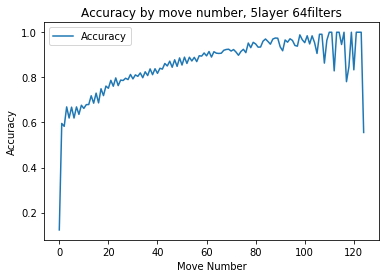

In [14]:
grouped.plot()
plt.title("Accuracy by move number, 5layer 64filters")
plt.xlabel("Move Number")
plt.ylabel("Accuracy")
plt.show()

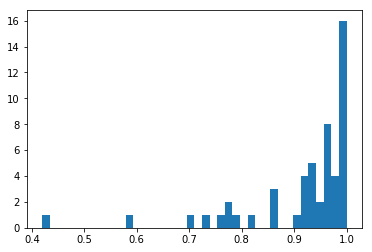

In [15]:
plot = plt.hist(df[df["Move Num"] == 70]["Accuracy"].values, bins = 40)
plt.show()